In [1]:
# Import the dependancies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Load the data from the CSV file
netflix_df = pd.read_csv('./input/Netflix_Userbase.csv')
netflix_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
# Checking the data for any null values
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


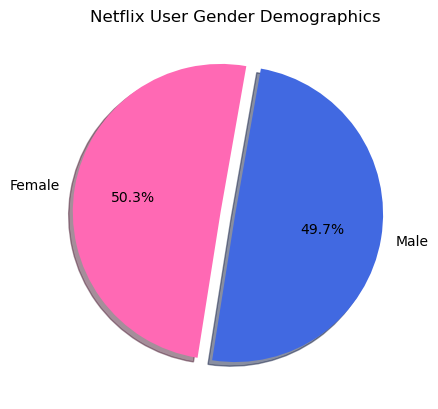

In [4]:
# Create a pie chart for the user genders
gender_data = netflix_df["Gender"].value_counts()
plt.pie(gender_data, labels=gender_data.index, autopct="%1.1f%%", colors=["hotpink", "royalblue"], explode=[0.1, 0],
       shadow=True, startangle=80)
plt.title("Netflix User Gender Demographics")

# Save chart image to folder
plt.savefig('./output/gender_chart.png')

# Show chart
plt.show()

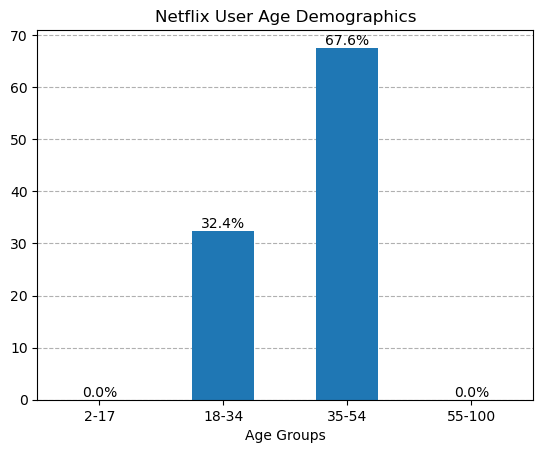

In [5]:
# Create a bar chart for the user ages
age_bins = [1, 17, 34, 54, 100]
age_groups = (pd.cut(netflix_df['Age'], age_bins).value_counts(normalize=True, sort=False).sort_index())

ax = (age_groups*100).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%.1f%%')
ax.set_xticklabels(f'{left+1}-{right}' 
    for left, right in zip(age_bins[:-1], age_bins[1:]))
ax.yaxis.grid(True, linestyle='--')
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelrotation = 0)
ax.set_title("Netflix User Age Demographics")
ax.set_xlabel("Age Groups")

# Save chart image to folder
ax.figure.savefig('./output/ages_chart.png')

In [6]:
# Group the data by 'Device' and calculate the count
grouped_df = netflix_df.groupby('Device').size().reset_index(name='Count')

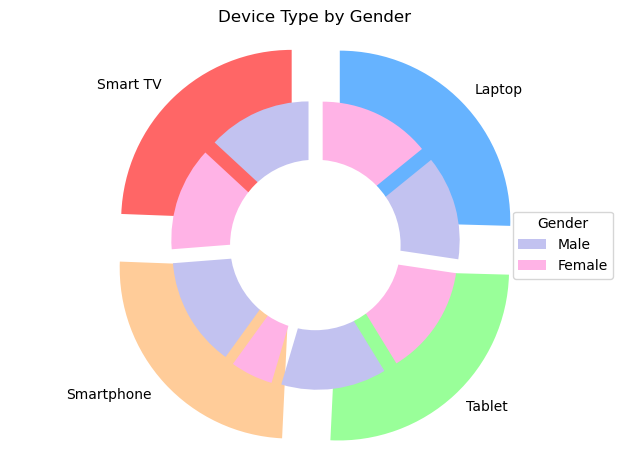

In [7]:
# Data to plot
labels = ['Smart TV', 'Smartphone', 'Tablet', 'Laptop']
sizes = [610, 621, 633, 636]
labels_gender = ['Man','Woman','Man','Woman','Man','Woman','Man','Woman']
sizes_gender = [305,305,321,125,310,323,307,329]
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']

explode = (0.2,0.2,0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode = explode)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90, explode = explode_gender)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')

# Create custom legend for 'Male' and 'Female'
legend_labels = ['Male', 'Female']
legend_colors = ['#c2c2f0', '#ffb3e6']
custom_legend = [plt.Rectangle((0, 0), 1, 1, fc=legend_colors[i]) for i in range(len(legend_labels))]

# Add the custom legend to the plot
plt.legend(custom_legend, legend_labels, title='Gender', loc='right')
plt.title('Device Type by Gender')
plt.tight_layout()
plt.savefig("./output/pie_device_gender.png")
plt.show()


In [8]:
device_revenue_df = netflix_df.groupby(['Device', 'Monthly Revenue']).size().reset_index(name='Count')

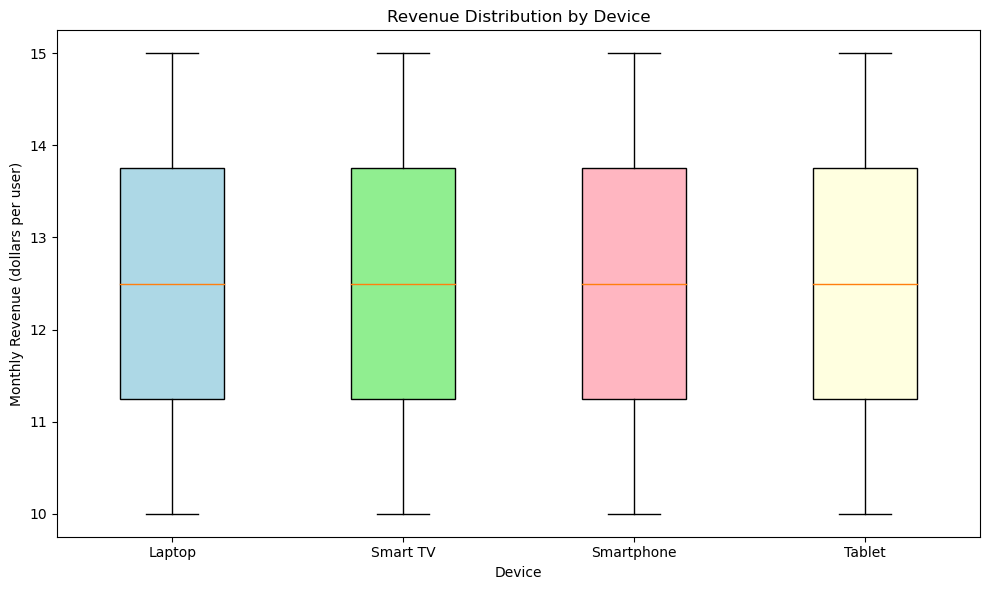

In [16]:
# Box plot Revenue by Device

# Create a dictionary to store the data for each 'Device' category
data_dict = {}
devices = device_revenue_df['Device'].unique()

for device in devices:
    data_dict[device] = device_revenue_df[device_revenue_df['Device'] == device]['Monthly Revenue'].values

plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(data_dict.values(), labels=devices, patch_artist=True)

# Customizing the box plot colors
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow']
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)

# Set the title and labels
plt.title('Revenue Distribution by Device')
plt.xlabel('Device')
plt.ylabel('Monthly Revenue (dollars per user)')
plt.tight_layout()
plt.savefig("./output/box_revenue_device.png")
# Show the plot
plt.show()


In [10]:
device_country_df = netflix_df.groupby(['Device', 'Country']).size().reset_index(name='Count')
device_country_df.head()

,Device,Country,Count
0,Laptop,Australia,47
1,Laptop,Brazil,44
2,Laptop,Canada,64
3,Laptop,France,52
4,Laptop,Germany,63


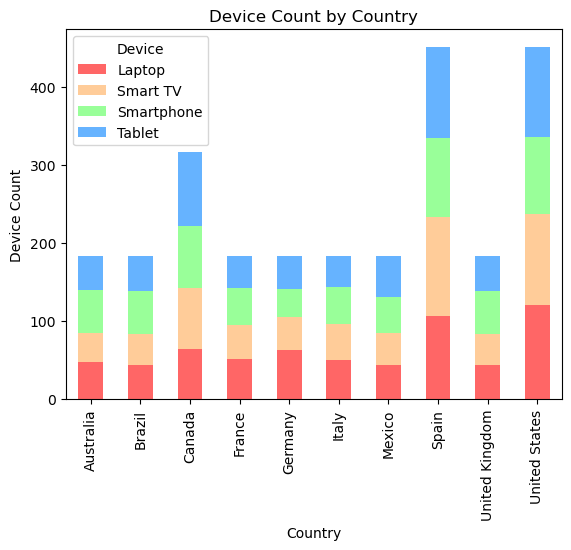

In [15]:
# Calculate the count of each device for each country
device_count = device_country_df.groupby(['Country', 'Device'])['Count'].sum().reset_index()

# Pivot the DataFrame to get devices as columns and countries as index
pivot_df = device_count.pivot(index='Country', columns='Device', values='Count')
pivot_df

# Set custom colors for the bars
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']

# Create the bar chart
ax = pivot_df.plot(kind='bar', stacked=True, color=colors)

# Set the title and labels
plt.title('Device Count by Country')
plt.xlabel('Country')
plt.ylabel('Device Count')

plt.savefig("./output/device_country.png")
# Show the plot
plt.show()

In [28]:
# Calculate the count of each device for each country
# Calculate the total count of devices for each country
total_counts = device_count.groupby('Country')['Count'].transform('sum')

# Calculate the percentage of each device within each country compared to that country's total
device_count['Percentage'] = (device_count['Count'] / total_counts) * 100
device_count['Percentage'] = device_count['Percentage'].round(0)
device_count = device_count.set_index(['Country', 'Device'])

# Calculate the count of each device for each country
device_count = device_country_df.groupby(['Country', 'Device'])['Count'].sum().reset_index()

# Calculate the total count of devices for each country
total_counts = device_count.groupby('Country')['Count'].transform('sum')

# Calculate the percentage of each device within each country compared to that country's total
device_count['Percentage'] = (device_count['Count'] / total_counts) * 100

# Round the percentage to 0 decimals
device_count['Percentage'] = device_count['Percentage'].round(0)

# Set 'Country' and 'Device' as the index labels
device_count = device_count.set_index(['Country', 'Device'])

# Filter the data for the 'US' and 'Spain' countries
us_spain_data = device_count.loc[['United States', 'Spain']]

# Group by 'Country' and 'Device' and calculate summary statistics for the percentages for the filtered data
summary_stats_us_spain = us_spain_data.groupby(level=[0, 1])['Percentage'].agg(['min', 'max', 'mean'])

summary_stats_us_spain

min   max  mean
Country       Device                      
Spain         Laptop      24.0  24.0  24.0
              Smart TV    28.0  28.0  28.0
              Smartphone  23.0  23.0  23.0
              Tablet      26.0  26.0  26.0
United States Laptop      27.0  27.0  27.0
              Smart TV    26.0  26.0  26.0
              Smartphone  22.0  22.0  22.0
              Tablet      25.0  25.0  25.0

In [ ]:
# Calculate the revenue by country and sort in descending order
revenue_by_country = netflix_df.groupby('Country')['Monthly Revenue'].sum().reset_index()
revenue_by_country = revenue_by_country.sort_values(by='Monthly Revenue', ascending=False)

# Calculate the percentage of revenue for each country
total_revenue = revenue_by_country['Monthly Revenue'].sum()
revenue_by_country['Percentage'] = (revenue_by_country['Monthly Revenue'] / total_revenue) * 100

In [ ]:
# Create a pie chart for revenue distribution by country
explode = [0.1 if country == 'United States' else 0 for country in revenue_by_country['Country']]
plt.pie(revenue_by_country['Percentage'], labels=revenue_by_country['Country'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, explode=explode)
plt.axis('equal')
plt.title('Netflix Revenue Distribution by Country')
plt.savefig('./output/Pie_Chart_Revenue_Distribution.png')
plt.show()

In [ ]:
# Calculate the revenue distribution by country for each subscription type
revenue_distribution = netflix_df.groupby(['Subscription Type', 'Country'])['Monthly Revenue'].sum().reset_index()
revenue_distribution.sort_values(by=['Subscription Type', 'Monthly Revenue'], ascending=[True, False], inplace=True)

In [ ]:
# Create a stacked bar chart for total monthly revenue by subscription type for each country
pivot_table = revenue_distribution.pivot(index='Country', columns='Subscription Type', values='Monthly Revenue').fillna(0)

plt.figure(figsize=(12, 8))
bottoms = None

for subscription_type in pivot_table.columns:
    if bottoms is None:
        plt.bar(pivot_table.index, pivot_table[subscription_type], label=subscription_type)
        bottoms = pivot_table[subscription_type]
    else:
        plt.bar(pivot_table.index, pivot_table[subscription_type], bottom=bottoms, label=subscription_type)
        bottoms += pivot_table[subscription_type]

plt.xlabel('Country')
plt.ylabel('Monthly Revenue')
plt.title('Total Monthly Revenue by Subscription Type for Each Country')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Save the image directly with the relative path
plt.savefig('./output/Stacked_Bar_Chart_Total_Monthly_Revenue.png')
plt.show()

In [17]:
# Change Join Date and Last Payment Date to date.time types
netflix_df["Join Date"] = pd.to_datetime(netflix_df["Join Date"])
netflix_df["Last Payment Date"] = pd.to_datetime(netflix_df["Last Payment Date"])

# Create new column to show number of days subscribed since joining. 
netflix_df["Days Subscribed"] = (netflix_df["Last Payment Date"] - netflix_df["Join Date"]).dt.days

# Create new column to show number of months subscribed since joining.
netflix_df["Months Subscribed"]= ((netflix_df["Last Payment Date"].dt.year - netflix_df["Join Date"].dt.year) * 12 
                                + (netflix_df["Last Payment Date"].dt.month - netflix_df["Join Date"].dt.month))
#Show Data 
netflix_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Days Subscribed,Months Subscribed
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629,21
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774,25
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262,8
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174,5


In [18]:
# Sort data from longest subscribed to shortest and drop the negative months subscribed from dataset
netflix_df = netflix_df.sort_values(by="Days Subscribed", ascending=False)
netflix_df = netflix_df[netflix_df["Days Subscribed"]>0]

In [19]:
# Calculate the count of users who subscribed less than 31 days divided by total users to see turnover rate
Turnover_df = netflix_df[netflix_df["Days Subscribed"]<=31]
Turnover_Rate = round((len(Turnover_df)/ len(netflix_df)) * 100,2)
Turnover_Rate

0.24

In [20]:
#Calculate the average months subscribed rounded to nearest month
average_length = round(netflix_df["Months Subscribed"].mean(),0)
average_length

11.0

In [21]:
# Create bins for age to compare subscription rate and turnover rate based on age
bins = [0, 30, 35, 40, 45, 50, 60]
labels = ["30 or Less", "30-35 Years Old", "35-40 Years Old", "40-45 Years Old","45-50 Years Old", "50 Years +"]
netflix_df["Age Group"] = pd.cut(netflix_df["Age"], bins=bins, labels=labels)

In [22]:
# Group data by age bin group created to show average months subscribed, average monthly revenue and turnover rate
avg_monthly = netflix_df.groupby(["Age Group"])["Monthly Revenue"].mean()
avg_months = netflix_df.groupby(["Age Group"])["Months Subscribed"].mean()
avg_days = netflix_df.groupby(["Age Group"])["Days Subscribed"].mean()
turnover_count = netflix_df[netflix_df["Days Subscribed"] <= 31].groupby(["Age Group"])["Days Subscribed"].count()
counts_group = netflix_df.groupby(["Age Group"])["User ID"].count()
turnover_percent = round(turnover_count/ counts_group * 100,2)

# Assemble into DataFrame
age_summary = pd.DataFrame(
                                {"Average Monthly Revenue": avg_monthly,
                                "Average Months": round(avg_months,2),
                                 "Average Days": round(avg_days,2),
                                "Number of Subscribers": counts_group,
                                "Turnover Percentage": turnover_percent})
age_sum = age_summary.reset_index()

# Display results
age_sum

,Age Group,Average Monthly Revenue,Average Months,Average Days,Number of Subscribers,Turnover Percentage
0,30 or Less,12.630952,11.41,345.06,420,0.00
1,30-35 Years Old,12.463265,10.77,325.45,490,0.00
2,35-40 Years Old,12.455969,10.63,321.76,511,0.20
3,40-45 Years Old,12.599585,10.91,328.68,482,0.83
4,45-50 Years Old,12.470468,10.85,327.58,491,0.20
5,50 Years +,12.225806,10.08,301.97,93,0.00


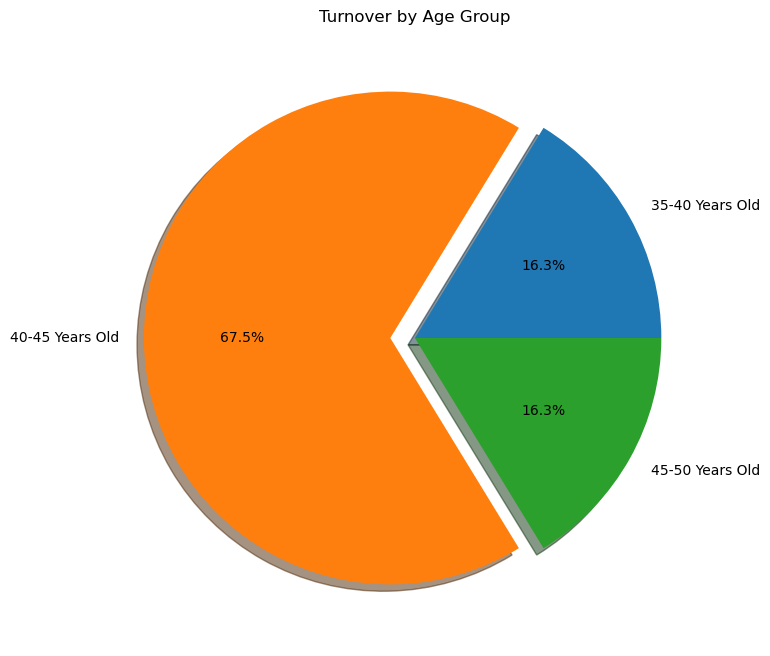

In [23]:
# Graph the age groups on the x axis and average month subscribed on y axis
age_sum_nozero = age_sum[age_sum["Turnover Percentage"] >0]
plt.figure(figsize=(8, 8))
plt.pie(age_sum_nozero["Turnover Percentage"], labels=age_sum_nozero["Age Group"], autopct="%1.1f%%", shadow=True,
       explode=(0,0.1,0))
plt.title("Turnover by Age Group")

# export the graph to a text file
plt.savefig('./output/Turnover_AgeGroup.png')

# show the graph
plt.show()

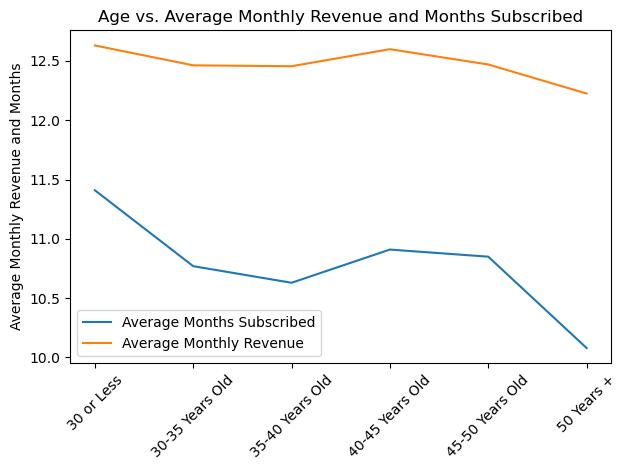

In [24]:
# Graph the age groups on the x axis and average month subscribed on y axis
plt.plot(age_sum["Age Group"],age_sum["Average Months"], label ="Average Months Subscribed")
plt.plot(age_sum["Age Group"],age_sum["Average Monthly Revenue"], label="Average Monthly Revenue")
         
plt.ylabel("Average Monthly Revenue and Months")
plt.title("Age vs. Average Monthly Revenue and Months Subscribed")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# export the graph to a text file
plt.savefig('./output/Age_Rev_Months.png')

# show the graph
plt.show()

In [25]:
# Create a group mapping and numeric value for each group to determine correlation and plot a regression line
age_group_mapping = {
    '30 or Less': 1,
    '30-35 Years Old': 2,
    '35-40 Years Old': 3,
    '40-45 Years Old': 4,
    '45-50 Years Old': 5,
    '50 Years +': 6}

# Convert the "Age Group" column to numerical values
age_sum['Age Group Numeric'] = age_sum['Age Group'].map(age_group_mapping)
age_sum['Age Group Numeric'] = age_sum['Age Group Numeric'].astype(int)
age_sum

,Age Group,Average Monthly Revenue,Average Months,Average Days,Number of Subscribers,Turnover Percentage,Age Group Numeric
0,30 or Less,12.630952,11.41,345.06,420,0.00,1
1,30-35 Years Old,12.463265,10.77,325.45,490,0.00,2
2,35-40 Years Old,12.455969,10.63,321.76,511,0.20,3
3,40-45 Years Old,12.599585,10.91,328.68,482,0.83,4
4,45-50 Years Old,12.470468,10.85,327.58,491,0.20,5
5,50 Years +,12.225806,10.08,301.97,93,0.00,6


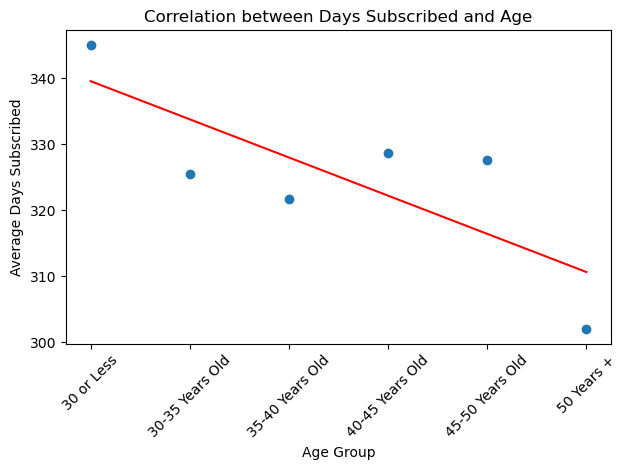

The correlation between age and the average days subscribed is -0.78


In [27]:
# Use the Pearson correlation coefficient to calculate the correlation between age 
# and average days subscribed. Correlations range from -1 to 1 with 0 implying no correlation.
correlation = st.pearsonr(age_sum["Age Group Numeric"],age_sum["Average Days"])

# Perform a linear regression 
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(age_sum["Age Group Numeric"],age_sum["Average Days"])

# Create equation of regression line
pe_fit = pe_slope * age_sum["Age Group Numeric"] + pe_int

# Plot and show the linear model on top 
plt.scatter(age_sum["Age Group"],age_sum["Average Days"])
plt.plot(age_sum["Age Group"], pe_fit, "-", color="red")
plt.xlabel("Age Group")
plt.ylabel("Average Days Subscribed")
plt.title("Correlation between Days Subscribed and Age")
plt.xticks(rotation=45)
plt.tight_layout()


# export the graph to a text file
plt.savefig('./output/Correlation.png')

# show the graph
plt.show()

#print the correlation between age and average days subscribed
print(f'The correlation between age and the average days subscribed is {round(correlation[0],2)}')